In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

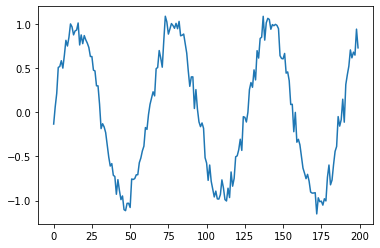

200


In [58]:
# armo un seno y le agrego o no ruido
series = (np.sin(0.1*np.arange(200))) + np.random.randn(200)*0.1

plt.plot(series)
plt.show()
print(len(series))

In [0]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)

In [90]:
#Autoregressive RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(15, activation='relu')(i) 
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

r = model.fit(
  X[:-N//2], Y[:-N//2], #uso la mitad para entrenar
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 74ms/step - loss: 0.2313 - val_loss: 0.1802
Epoch 2/80
3/3 [==============================] - 0s 22ms/step - loss: 0.1324 - val_loss: 0.1281
Epoch 3/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0826 - val_loss: 0.0818
Epoch 4/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0519 - val_loss: 0.0479
Epoch 5/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0332 - val_loss: 0.0281
Epoch 6/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0203 - val_loss: 0.0314
Epoch 7/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0248 - val_loss: 0.0262
Epoch 8/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0207 - val_loss: 0.0227
Epoch 9/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0182 - val_loss: 0.0214
Epoch 10/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0171 - val_loss: 0.0239
Epoch 11/80
3/3 [============

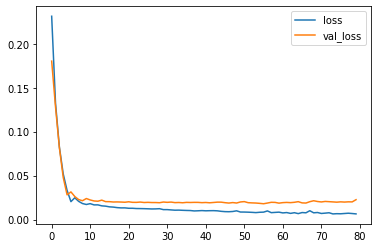

In [91]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
#1 step forcast -> mal

validation_target = Y[-N//2:]
validation_predictions = []
i = -N//2 #arranco en la mitad

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1
  
  validation_predictions.append(p)

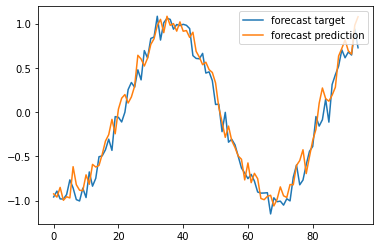

In [93]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

#esta bien pero obviamente no representa la calidad del modelo

In [0]:
#Prediccion con predicciones pasadas

validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar

  validation_predictions.append(p)
  
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

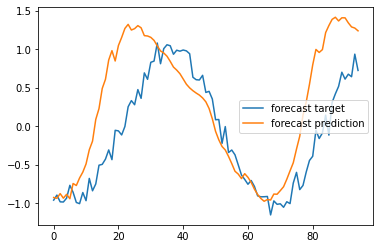

In [95]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()